# Customer Churn Prediction Project
## Introduction

Customer churn, also known as customer attrition, refers to the phenomenon where customers cease their relationship with a business or service. It is a critical challenge for companies across various industries, including banking. Being able to predict customer churn can provide valuable insights to companies, allowing them to take proactive measures to retain customers and improve customer satisfaction.

In this Jupyter notebook project, we will explore a dataset called "Bank Customer Churn Prediction." This dataset contains information about bank customers and their characteristics, such as credit score, country, gender, age, tenure, balance, and more. We will leverage this dataset to build a predictive model that can identify potential churners.

The project will be divided into the following sections:

1. **Data Loading and Exploration**: We will begin by loading the dataset into our notebook and gaining an understanding of its structure and content. We will explore the different variables, check for missing values, and perform any necessary data cleaning steps.

2. **Data Visualization**: Visualizations can provide valuable insights into the relationships between different variables and help identify patterns and trends. We will create visualizations using libraries like Matplotlib or Seaborn to explore the data further.

3. **Data Preprocessing**: Before training a predictive model, we need to preprocess the data. This step involves handling categorical variables, scaling numerical features, and splitting the dataset into training and testing sets.

4. **Model Training and Evaluation**: We will select a suitable machine learning algorithm and train it on the preprocessed data. We will evaluate the model's performance using appropriate metrics and make any necessary adjustments to improve its predictive capabilities.

5. **Customer Churn Prediction**: Using the trained model, we will make churn predictions on new, unseen data. We will discuss the importance of interpretability and explore methods to interpret the model's predictions.

By the end of this project, you will have gained hands-on experience in reading, cleaning, visualizing, and predicting customer churn using machine learning techniques. So, let's get started!


In [1]:
# Loading of required modules
import pandas as pd
import seaborn as sns
import numpy as numpy
import matplotlib.pyplot as plt 
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler

## 1. Data Loading and Exploration

In [2]:
# Read the dataset
df = pd.read_csv('Bank_Customer_Churn_Prediction.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Get the dimensions of the dataset
print("\nDataset dimensions:")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Check the data types of each column
print("\nData types of the columns:")
print(df.dtypes)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Get summary statistics of the numerical columns
print("\nSummary statistics:")
print(df.describe())


First few rows of the dataset:
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  

Dataset dimensions:
Number of rows: 10000
Number of columns: 12

Data types of the columns:

The dataset consists of information about 10,000 bank customers. Here are some key findings:

- The dataset contains various attributes such as credit score, country, gender, age, tenure, balance, products number, credit card status, active membership, estimated salary, and churn.

- The dataset is complete, with no missing values in any of the columns.

- Customers have an average credit score of 650.53, with a standard deviation of 96.65.

- The average age of customers is approximately 38.92 years, with a standard deviation of 10.49.

- Customers have an average tenure of 5.01, indicating the average duration of their relationship with the bank.

- The average balance across all customers is approximately 76,485.89 USD, with a standard deviation of 62,397.41 USD.

- Most customers have one product, with an average of 1.53 products per customer.

- Around 70.55% of customers have a credit card, while approximately 51.51% are active members.

- The estimated salary of customers ranges from 11.58 USD to 199,992.48 USD, with an average of 100,090.24 USD.

- The churn rate is 20.37%, suggesting that approximately one-fifth of the customers have churned.

## 2. Data Visualization

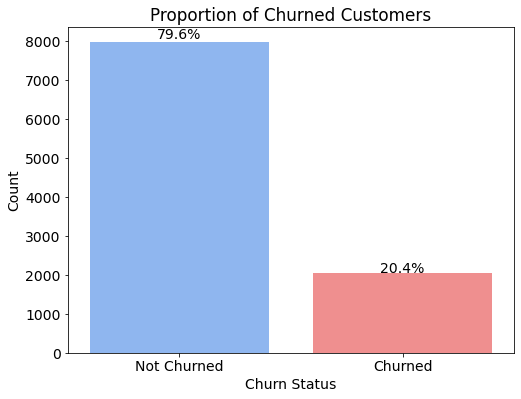

In [3]:
# Calculate the percentage of churned and retained customers
churned_percent = df['churn'].value_counts(normalize=True)[1] * 100
retained_percent = df['churn'].value_counts(normalize=True)[0] * 100

# Adjust the figure size and fontsize
plt.figure(figsize=(8, 6))  # Set the figure size as desired
plt.rcParams.update({'font.size': 14})  # Set the desired fontsize

# Create a countplot to visualize the proportion of churned customers
sns.countplot(data=df, x='churn', palette=['#7FB3FF', '#FF7F7F'])
plt.title('Proportion of Churned Customers')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Churned', 'Churned'])

# Add percentage text on the bars
total_count = df.shape[0]
churned_count = df['churn'].value_counts()[1]
retained_count = df['churn'].value_counts()[0]

# Calculate the y-coordinate for label placement above the tick
y_churned = churned_count + 30 if churned_count > retained_count else churned_count - 50
y_retained = retained_count + 30 if retained_count > churned_count else retained_count - 50

plt.text(1, y_churned, f'{churned_percent:.1f}%', ha='center', va='bottom')
plt.text(0, y_retained, f'{retained_percent:.1f}%', ha='center', va='bottom')

# Save the plot with better resolution
plt.savefig('graphs/churned_or_not_churned.png', dpi=300)

# Show the plot
plt.show()


In this dataset, there is an imbalance between the number of retained customers and the number of customers who left the bank. Retained customers are over-represented, comprising approximately 20.4% of the dataset, while customers who left the bank account for the remaining portion. This imbalance can potentially introduce bias in the modeling process.

<Figure size 864x864 with 0 Axes>

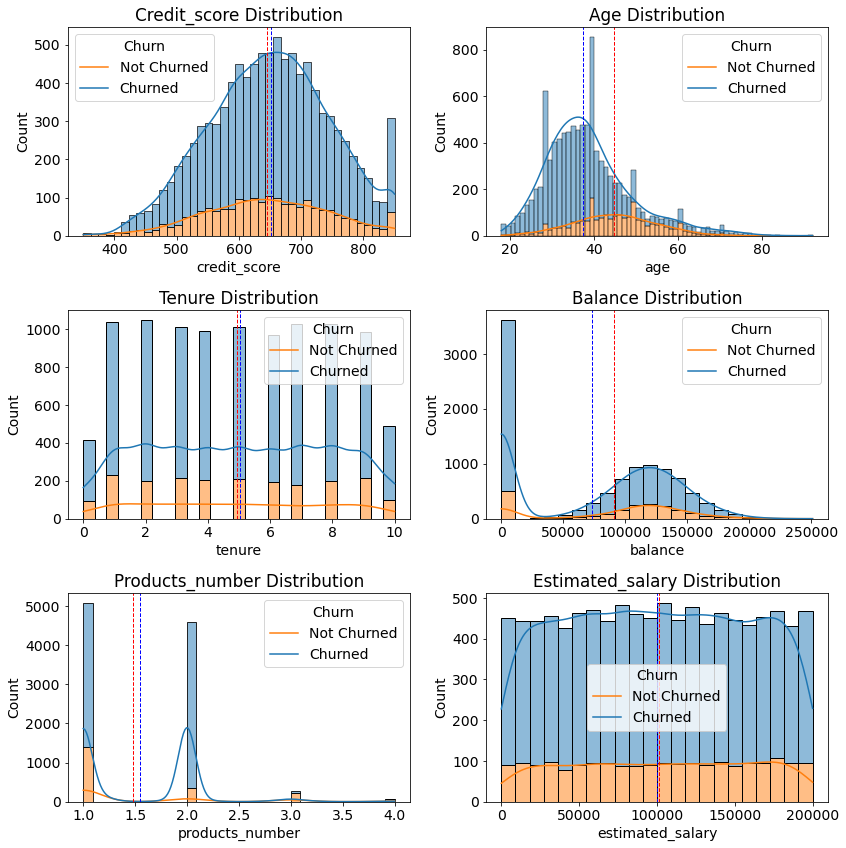

           Variable  Mean Not Churned   Mean Churned
0      credit_score        651.853196     645.351497
1               age         37.408389      44.837997
2            tenure          5.033279       4.932744
3           balance      72745.296779   91108.539337
4   products_number          1.544267       1.475209
5  estimated_salary      99738.391772  101465.677531


In [4]:
import pandas as pd

# Set a pastel color palette
colors = ['#A9CCE3', '#F5B7B1']
# Adjust the figure size and fontsize
plt.figure(figsize=(12, 12))  # Set the figure size as desired
plt.rcParams.update({'font.size': 14})  # Set the desired fontsize

# Define the continuous variables
continuous_vars = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# Create subplots for each variable
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Dataframe to store the average values
average_df = pd.DataFrame(columns=['Variable', 'Mean Not Churned', 'Mean Churned'])

# Iterate over the continuous variables
for i, var in enumerate(continuous_vars):
    row = i // 2  # Row index for subplot
    col = i % 2  # Column index for subplot
    
    # Plot distribution for churned and not churned customers
    ax = sns.histplot(data=df, x=var, hue='churn', kde=True, multiple='stack', ax=axes[row, col])
    ax.set_title(f'{var.capitalize()} Distribution')
    
    # Add axvline for mean values
    mean_not_churned = df[var][df['churn'] == 0].mean()
    mean_churned = df[var][df['churn'] == 1].mean()
    ax.axvline(mean_not_churned, color='blue', linestyle='dashed', linewidth=1)
    ax.axvline(mean_churned, color='red', linestyle='dashed', linewidth=1)
    
    # Create legends for distribution and axvlines
    dist_legend = ax.legend(title='Churn', labels=['Not Churned', 'Churned'])
    
    # Add average values to the dataframe
    average_df = average_df.append({
        'Variable': var,
        'Mean Not Churned': mean_not_churned,
        'Mean Churned': mean_churned
    }, ignore_index=True)

# Adjust spacing between subplots
plt.tight_layout()

# Save the plot with better resolution
plt.savefig('graphs/dist_continuous_variables.png', dpi=300)

# Display the plots
plt.show()

# Print the average values table
print(average_df)


- **credit_score:** On average, not churned customers have a slightly higher credit score (651.85) compared to churned customers (645.35).
- **age:** The average age of churned customers (44.84) is higher than that of not churned customers (37.41).
- **tenure:** There is a negligible difference in the average tenure between not churned (5.03) and churned (4.93) customers.
- **balance:** Churned customers have a higher average balance (91108.54) compared to not churned customers (72745.30).
- **products_number:** The average number of products is slightly lower for churned customers (1.48) compared to not churned customers (1.54).
- **estimated_salary:** The average estimated salary is slightly higher for churned customers (101465.68) compared to not churned customers (99738.39).


<ipython-input-5-c1c98cf1dd75>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])
<ipython-input-5-c1c98cf1dd75>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])
<ipython-input-5-c1c98cf1dd75>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])
<ipython-input-5-c1c98cf1dd75>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])


<Figure size 720x720 with 0 Axes>

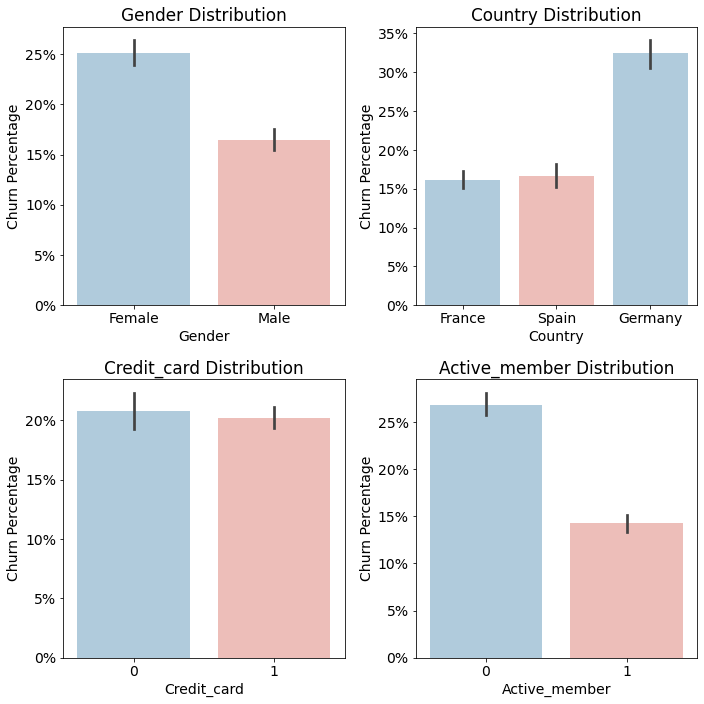

,Variable,Category,Churned Percentage
0,Gender,Female,25.071539
1,Gender,Male,16.455928
2,Country,France,16.154767
3,Country,Spain,16.673395
4,Country,Germany,32.443204
5,Credit_card,1,20.184266
6,Credit_card,0,20.814941
7,Active_member,1,14.269074
8,Active_member,0,26.850897


In [5]:
# Set a pastel color palette
colors = ['#A9CCE3', '#F5B7B1']
plt.figure(figsize=(10, 10))  # Set the figure size as desired
plt.rcParams.update({'font.size': 14})  # Set the desired fontsize

# Create subplots for each variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Define the categorical variables
categorical_vars = ['gender', 'country', 'credit_card', 'active_member']

# Iterate over the categorical variables
for i, var in enumerate(categorical_vars):
    row = i // 2
    col = i % 2

    # Calculate the churn percentage for each category
    category_percentage = df.groupby(var)['churn'].mean() * 100

    # Plot the variable distribution
    ax = sns.barplot(data=df, x=var, y='churn', palette=colors, ax=axes[row, col])
    ax.set_title(f'{var.capitalize()} Distribution')
    ax.set_xlabel(var.capitalize())
    ax.set_ylabel('Churn Percentage')

    # Convert y-axis labels to percentages
    ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('graphs/dist_categorical_variables.png', dpi=300)

# Display the plots
plt.show()

# Create a table for the percentage distribution
percentage_table = pd.DataFrame(columns=['Variable', 'Category', 'Churned Percentage'])

# Iterate over the categorical variables
for var in categorical_vars:
    categories = df[var].unique()
    for category in categories:
        churned_percentage = df[df[var] == category]['churn'].mean() * 100
        percentage_table = percentage_table.append({'Variable': var.capitalize(),
                                                    'Category': category,
                                                    'Churned Percentage': churned_percentage},
                                                   ignore_index=True)

# Display the percentage table
percentage_table


- **Gender:** The churned percentage for female customers is 25.07%, while for male customers it is 16.46%. This suggests that female customers have a higher likelihood of churning compared to male customers.
- **Country:** Among the countries in the dataset, Germany has the highest churned percentage at 32.44%, followed by Spain at 16.67% and France at 16.15%. This indicates that customers from Germany are more likely to churn compared to customers from the other countries.
- **Credit Card:** Both categories, 0 and 1, have similar churned percentages of approximately 20.18% and 20.81% respectively. This suggests that the presence of a credit card does not significantly impact the likelihood of churn.
- **Active Member:** Customers who are active members (category 1) have a lower churned percentage of 14.27%, while non-active members (category 0) have a higher churned percentage of 26.85%. This indicates that being an active member contributes to higher customer retention.


## 3. Data Preprocessing

### Feature Analysis

The aim of this part of the code is to perform a comprehensive analysis of the dataset's features and their relationships. By calculating the correlation matrix, we aim to uncover any linear associations between continuous variables, which helps us understand how changes in one variable may impact another. Additionally, conducting the chi-square analysis allows us to examine the dependence between categorical variables and identify any significant associations. This information is crucial for gaining insights into the underlying patterns, dependencies, and potential predictors within the dataset. Ultimately, this analysis aids in feature selection, identifying key variables, and understanding the factors that may influence the target variable or outcome of interest.

<Figure size 576x432 with 0 Axes>

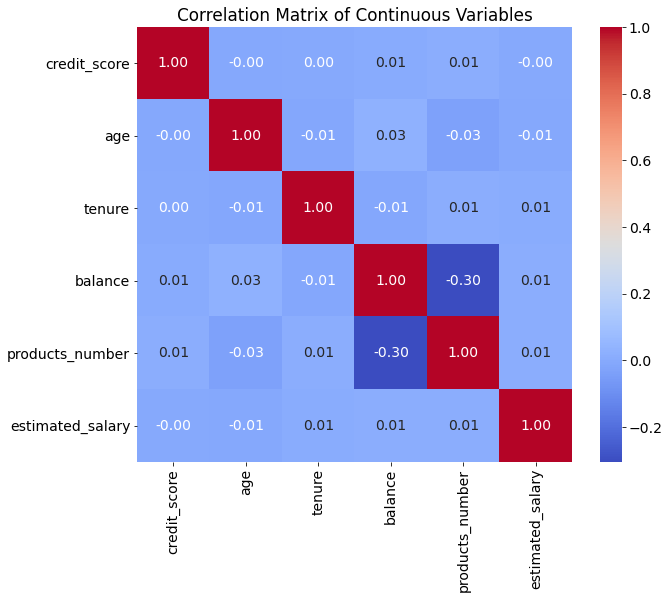

In [6]:
# Select the continuous variables
continuous_columns = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# Create a correlation matrix
corr_matrix = df[continuous_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))  # Set the figure size as desired
plt.rcParams.update({'font.size': 14})  # Set the desired fontsize

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Continuous Variables')
plt.savefig('graphs/corr_matrix.png',dpi = 300)

plt.show()


Looking at the correlation matrix of the continuous variables, we can observe the following:

- Credit Score: It shows very weak correlation with all other variables, indicating that it may not have a significant impact on the other variables or the churn rate. It could be a candidate for dropping.

- Age: There is no strong correlation with any other variable. However, age is often considered an important factor in predicting churn, so it may still be valuable to retain.

- Tenure: It has a very weak positive correlation with estimated salary. This suggests that customers with longer tenure may have slightly higher estimated salaries, but the correlation is not strong enough to conclude a significant impact on churn.

- Balance: There is a weak negative correlation with products number, indicating that customers with higher balances may have fewer products. However, the correlation is not strong enough to make a definite conclusion about its impact on churn.

- Products Number: It has a weak negative correlation with balance, suggesting that customers with more products may have lower balances. However, the correlation is not strong enough to make a conclusive judgment about its impact on churn.

- Estimated Salary: It shows no strong correlation with any other variable, indicating that it may not have a significant impact on the other variables or the churn rate. It could be a candidate for dropping.

Based on these observations, the variables that could potentially be dropped are "credit_score" and "estimated_salary" as they exhibit weak correlations with other variables. However, it is important to further analyze these variables and consider other factors before making a final decision on variable selection.

In [7]:
categorical_columns = ['active_member', 'credit_card', 'gender', 'country']
chi2_array, p_array = [], []

target_variable = 'churn'  # Replace with the actual target variable column name

for column in categorical_columns:
    crosstab = pd.crosstab(df[column], df[target_variable])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': categorical_columns,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi = df_chi.sort_values(by='Chi-square', ascending=False)

print(df_chi)


        Variable  Chi-square       p-value
3        country  301.255337  3.830318e-66
0  active_member  242.985342  8.785858e-55
2         gender  112.918571  2.248210e-26
1    credit_card    0.471338  4.923724e-01


**Based on the chi-square test results, we can conclude the following:**

- Country: The country variable shows a significant association with the churn rate, as indicated by the high chi-square value and very low p-value. Therefore, the country variable has an impact on the churn rate.

- Active Member: The active_member variable also demonstrates a significant association with the churn rate, as evidenced by the high chi-square value and very low p-value. Hence, the active_member variable affects the churn rate.

- Gender: The gender variable exhibits a moderate association with the churn rate, as indicated by a relatively high chi-square value and low p-value. Therefore, the gender variable has an impact on the churn rate.

- Credit Card: The credit_card variable shows no significant association with the churn rate, as the chi-square value is relatively low and the p-value is above the typical significance level of 0.05. Thus, the credit_card variable does not appear to have an impact on the churn rate.

In summary, country, active_member, and gender variables have an impact on the churn rate, while the credit_card variable does not. 

**Based on the two previous analysis, the variables  "credit_card", "credit_score" and "estimated_salary" will be dropped**

In [8]:
# Drop the specified variables from the dataset
df = df.drop(["credit_card", "credit_score", "estimated_salary","customer_id"], axis=1)

### Encoding of categorical descriptors

In [9]:
# Create a copy of the original dataset
df_encoded = df.copy()

# Perform one-hot encoding for gender and country variables
categorical_columns = ['gender', 'country']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns)

# Perform label encoding for active_member variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_encoded['active_member'] = label_encoder.fit_transform(df_encoded['active_member'])

# Print the encoded dataset
print(df_encoded.head())

df = df_encoded


   age  tenure    balance  products_number  active_member  churn  \
0   42       2       0.00                1              1      1   
1   41       1   83807.86                1              1      0   
2   42       8  159660.80                3              0      1   
3   39       1       0.00                2              0      0   
4   43       2  125510.82                1              1      0   

   gender_Female  gender_Male  country_France  country_Germany  country_Spain  
0              1            0               1                0              0  
1              1            0               0                0              1  
2              1            0               1                0              0  
3              1            0               1                0              0  
4              1            0               0                0              1  


### Min-Max scaling

Scaling is important in machine learning to ensure variables are on a similar scale. Min-Max scaling, or normalization, transforms data to a fixed range (e.g., 0-1). It preserves relative relationships between data points, benefits non-Gaussian distributions, and improves algorithm performance and convergence. Scaling eliminates bias from variables with larger magnitudes and facilitates accurate predictions.

In [10]:
# Initialize the scaler
scaler = MinMaxScaler()

# Select the continuous descriptors to be scaled
continuous_descriptors = ['age', 'tenure', 'balance', 'products_number']

# Apply Min-Max scaling to the selected descriptors
df[continuous_descriptors] = scaler.fit_transform(df[continuous_descriptors])


## Model Training and Evaluation

### Splitting in test and train sets

In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df.drop('churn', axis=1)  # Features (all columns except 'churn')
y = df['churn']  # Target variable ('churn')

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic Regression

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Preprocessing (e.g., scaling, encoding categorical variables)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the machine learning model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.8120


In [30]:
from sklearn.metrics import classification_report

# Predict labels for the test set
y_pred = model.predict(X_test_scaled)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



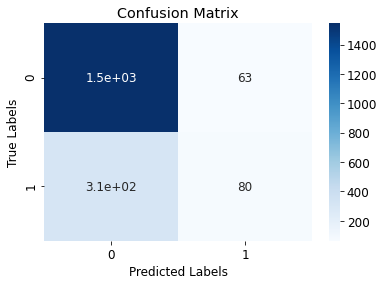

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('graphs/confusion_matrix_LR',dpi = 300)
plt.show()

- Test Accuracy: The model achieved an accuracy of 81.20% on the test set, indicating that it correctly classified 81.20% of the samples.

- Precision: For the positive class (churned customers), the precision is 0.56, suggesting that out of all the predicted churned customers, only 56% were actually churned.

- Recall: The recall for the positive class is 0.20, indicating that the model was able to correctly identify only 20% of the actual churned customers.

- F1-Score: The F1-score is a harmonic mean of precision and recall. For the positive class, the F1-score is 0.30, reflecting a trade-off between precision and recall.

- Confusion Matrix: the matrix shows that the model correctly predicted 1544 non-churned customers (true negatives) and 80 churned customers (true positives). However, it also misclassified 63 non-churned customers as churned (false positives) and 313 churned customers as non-churned (false negatives).

### Support Vector Machine (SVM)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Preprocessing (e.g., scaling, encoding categorical variables)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the SVM model
model_svm = SVC()
model_svm.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
accuracy = model_svm.score(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


Test Accuracy: 0.8620


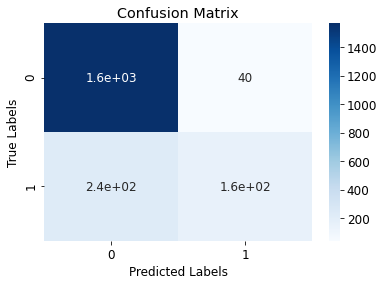

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1607
           1       0.80      0.40      0.53       393

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [47]:
from sklearn.metrics import classification_report


# Predict the labels for the test set
y_pred_svm = model_svm.predict(X_test_scaled)

# Create the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix

sns.heatmap(cm_svm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('graphs/confusion_matrix_SVM',dpi = 300)
plt.show()


# Generate classification report
report = classification_report(y_test, y_pred_svm)
print(report)


- Test Accuracy: The model achieved an accuracy of 86.20% on the test set, indicating that it correctly classified 86.20% of the samples.

- Precision: For the positive class (churned customers), the precision is 0.80, suggesting that out of all the predicted churned customers, 80% were actually churned.

- Recall: The recall for the positive class is 0.40, indicating that the model was able to correctly identify 40% of the actual churned customers.

- F1-Score: The F1-score is a harmonic mean of precision and recall. For the positive class, the F1-score is 0.53, reflecting a trade-off between precision and recall.

- Confusion Matrix: the matrix shows that the model correctly predicted 1567 non-churned customers (true negatives) and 157 churned customers (true positives). However, it misclassified 40 non-churned customers as churned (false positives) and 236 churned customers as non-churned (false negatives).

## Conclusion

In this project, we developed and evaluated two models, a Support Vector Machine (SVM) model and a logistic regression model, for predicting bank customer churn. Here is a comparison of their performance and suggestions for improvement:

```
SVM Model:
    Accuracy: 86.20%
    Precision (Churned Customers): 0.80
    Recall (Churned Customers): 0.40
    F1-Score (Churned Customers): 0.53

Logistic Regression Model:
    Accuracy: 81.20%
    Precision (Churned Customers): 0.56
    Recall (Churned Customers): 0.20
    F1-Score (Churned Customers): 0.30
```

The SVM model outperforms the logistic regression model in terms of accuracy and performance for customer churn prediction.